In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install keras

In [3]:
!pip install tensorflow

In [4]:
!pip install seaborn

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 53s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
single_image=x_train[0]

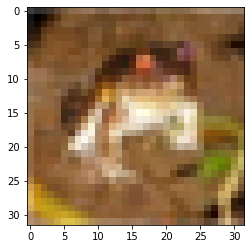

In [10]:
plt.imshow(single_image) #to display 2D image

In [11]:
y_train #initaially labels will be continous values and the model tries to predict values such as 5.5 so we have to convert it to categorical

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_test=to_categorical(y_test,10) #Converting to binary class matrix

In [14]:
y_cat_train=to_categorical(y_train,10)

In [15]:
single_image.max()

255

In [16]:
single_image.min()

0

In [17]:
#Scaling the image between 0 t0 1
x_train=x_train/255

In [18]:
x_test=x_test/255

In [19]:
scaled_image=x_train[0]

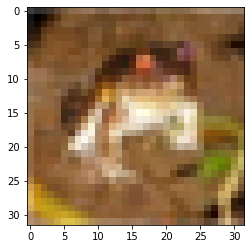

In [20]:
plt.imshow(scaled_image)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D, Conv2D,Flatten

In [26]:
model=Sequential()

In [27]:
#Adding layers
#Adding conv layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
#Adding pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))#output layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping #To overcome overfitting

In [29]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [30]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 690s 14ms/sample - loss: 1.4957 - acc: 0.4596 - val_loss: 1.3059 - val_acc: 0.5334
Epoch 2/15
50000/50000 [==============================] - 314s 6ms/sample - loss: 1.1739 - acc: 0.5839 - val_loss: 1.1119 - val_acc: 0.6122
Epoch 3/15
50000/50000 [==============================] - 104s 2ms/sample - loss: 1.0348 - acc: 0.6370 - val_loss: 1.0338 - val_acc: 0.6337
Epoch 4/15
50000/50000 [==============================] - 97s 2ms/sample - loss: 0.9214 - acc: 0.6794 - val_loss: 1.0113 - val_acc: 0.6476
Epoch 5/15
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.8291 - acc: 0.7116 - val_loss: 0.9468 - val_acc: 0.6699
Epoch 6/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.7494 - acc: 0.7390 - val_loss: 1.0089 - val_acc: 0.6607
Epoch 7/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.6796 - acc: 0.7612 - val_loss

In [31]:
#model evaluation
metrics=pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,acc,val_loss,val_acc
0,1.495671,0.45964,1.305894,0.5334
1,1.173902,0.58388,1.111897,0.6122
2,1.034841,0.63700,1.033764,0.6337
3,0.921417,0.67936,1.011279,0.6476
4,0.829098,0.71158,0.946842,0.6699
5,0.749393,0.73898,1.008896,0.6607
6,0.679608,0.76122,0.949625,0.6835


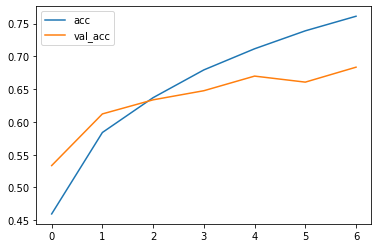

In [37]:
metrics[['acc','val_acc']].plot()

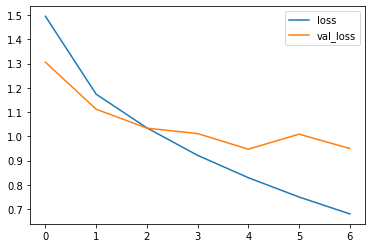

In [38]:
metrics[['loss','val_loss']].plot()

In [39]:
model.evaluate(x_test,y_cat_test,verbose=0) #val_accuracy and val_loss values

[0.9496254036903381, 0.6835]

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
predictions=model.predict_classes(x_test)

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.78      0.86      0.82      1000
           2       0.63      0.56      0.59      1000
           3       0.53      0.45      0.49      1000
           4       0.71      0.51      0.59      1000
           5       0.53      0.63      0.58      1000
           6       0.75      0.79      0.77      1000
           7       0.69      0.77      0.73      1000
           8       0.75      0.79      0.77      1000
           9       0.80      0.69      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [43]:
confusion_matrix(y_test,predictions)

array([[793,  29,  24,  20,  11,  10,   5,  13,  68,  27],
       [ 34, 859,   6,   8,   2,   4,   5,   5,  32,  45],
       [ 99,   9, 561,  54,  45,  95,  67,  39,  21,  10],
       [ 32,  15,  63, 447,  48, 226,  69,  55,  27,  18],
       [ 31,   7,  93,  69, 512,  69,  72, 111,  27,   9],
       [ 27,   5,  60, 135,  27, 632,  27,  66,  12,   9],
       [ 12,  10,  43,  57,  28,  33, 789,  12,  11,   5],
       [ 16,   5,  24,  29,  39,  86,   5, 772,   8,  16],
       [ 87,  48,   9,  12,   3,   7,   4,  13, 785,  32],
       [ 61, 112,  10,  12,   7,  20,   8,  30,  55, 685]], dtype=int64)

In [44]:
import seaborn as sns

In [45]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

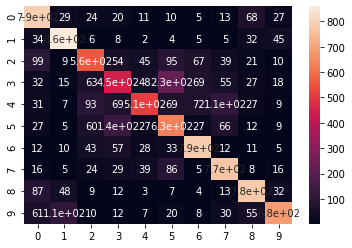

In [46]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [47]:
#predicting new datapoint
my_image=x_test[0]

In [48]:
y_test[0]

array([3])

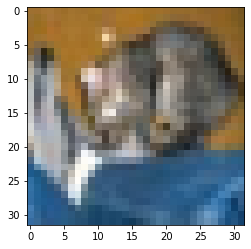

In [50]:
plt.imshow(my_image.reshape(32,32,3))

In [52]:
model.predict_classes(my_image.reshape(1,32,32,3)) #this must be same as y_test[0] which is 3

array([3], dtype=int64)